In [1]:
## Carregando bibliotecas básicas(algumas tem que ser instaladas via install_github() )
library(devtools) # necessario para carregar bibliotecas de terceiros. Pacote exige instalacao de varias dependencias no sistema.
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [2]:
# Carregando dados brutos
dados.raw = read.csv("dadoslimpos_R.csv",stringsAsFactors = TRUE, header = TRUE, na.strings=c("","-","NA"))
# criando DF e nomeando indivíduos com base na coluna Country
dados = data.frame(dados.raw, check.names = FALSE) 

In [22]:
head(dados)

X,aluno_id,qtd_filhos,media_final,percentual_frequencia,ch_hora_relogio,ano_letivo__ano,periodo_letivo,ensino_fundamental_conclusao,ano_letivo__ano_aluno,...,cep,pessoa_fisica__nascimento_data,descricao,codigo_censup,codigo_siape,descricao_raca,inativo_siape,descricao_estado_civil,descricao_situacao_matricula,categorias
0,471409825937,1,85,100,60,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D
1,471409825937,1,80,90,60,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D
2,471409825937,1,83,100,60,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D
3,471409825937,1,90,85,30,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D
4,471409825937,1,67,100,30,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D
5,471409825937,1,85,100,30,2016,1,2000,2015,...,59082-420,17/06/1986,"Técnico de Nível Médio em Segurança do Trabalho, na Forma Subsequente [2012] - Campus Natal-Central",0,9,Não declarado,False,Casado(a),Trancado,D


In [12]:
library(DescTools)
Desc(dados, plotit=F)

------------------------------------------------------------------------------ 
Describe dados (data.frame):

data.frame:	33646 obs. of  46 variables

  Nr  ColName                             Class    NAs          Levels       
  1   X                                   integer     .                      
  2   aluno_id                            numeric     .                      
  3   media_final                         integer     .                      
  4   percentual_frequencia               numeric     .                      
  5   ch_hora_relogio                     integer     .                      
  6   descricao_historico                 factor      .         (138):       
                                                                1-Análise    
                                                                e            
                                                                Elaboração   
                                                                de   

In [14]:
# Gerando matriz de independencia pelo chi-squared
#http://www.sthda.com/english/wiki/chi-square-test-of-independence-in-r

table(dados$descricao_situacao_matricula, dados$categorias)
chisq.test(dados$descricao_situacao_matricula, dados$categorias, correct=FALSE)

#We have a chi-squared value of 5.55. Since we get a p-Value less than the significance level of 0.05, 
#we reject the null hypothesis and conclude that the two variables are in fact dependent. Sweet!

                            
                                 A     B     C     D     E
  Afastado                       0     0     0     0     2
  Aguardando Colação de Grau     0     0     0     0     1
  Cancelado                      3     0    12    38   105
  Concludente                    0     0     0     7     7
  Concluído                      0     0    38    48   100
  Estagiario (Concludente)       0     0     1     8    13
  Evasão                         0     0     0     0     1
  Falecido                       0     7    17    60   220
  Jubilado                       5    56   707  1918  7175
  Trancado                       0    55  1704  4366 16564
  Transferido Externo            0     2    37    89   280

Warning message in chisq.test(dados$descricao_situacao_matricula, dados$categorias, :
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  dados$descricao_situacao_matricula and dados$categorias
X-squared = 375.38, df = 40, p-value < 2.2e-16


In [15]:
chisq <- chisq.test(dados$descricao_raca, dados$categorias, correct=FALSE)

chisq$observed

Warning message in chisq.test(dados$descricao_raca, dados$categorias, correct = FALSE):
"Chi-squared approximation may be incorrect"

                    dados$categorias
dados$descricao_raca     A     B     C     D     E
       Amarela           0     0    33     8   305
       Branca            0    96  1204  2449  7902
       Indígena          0     0     0     0    25
       Não declarado     0     0   154   362   938
       Parda             8     0   889  3247 12796
       Preta             0    24   236   468  2502

In [16]:
round(chisq$expected,2)

,A,B,C,D,E
Amarela,0.08,1.23,25.87,67.19,251.62
Branca,2.77,41.55,871.25,2262.61,8472.82
Indígena,0.01,0.09,1.87,4.85,18.18
Não declarado,0.35,5.19,108.73,282.36,1057.38
Parda,4.03,60.42,1266.75,3289.72,12319.08
Preta,0.77,11.52,241.53,627.26,2348.92


In [17]:
round(chisq$residuals, 3)

                    dados$categorias
dados$descricao_raca       A       B       C       D       E
       Amarela        -0.287  -1.111   1.401  -7.221   3.365
       Branca         -1.664   8.446  11.273   3.919  -6.201
       Indígena       -0.077  -0.299  -1.367  -2.203   1.599
       Não declarado  -0.588  -2.277   4.342   4.739  -3.671
       Parda           1.979  -7.773 -10.613  -0.745   4.297
       Preta          -0.876   3.677  -0.356  -6.359   3.159

Warning message:
"package 'corrplot' was built under R version 3.3.3"

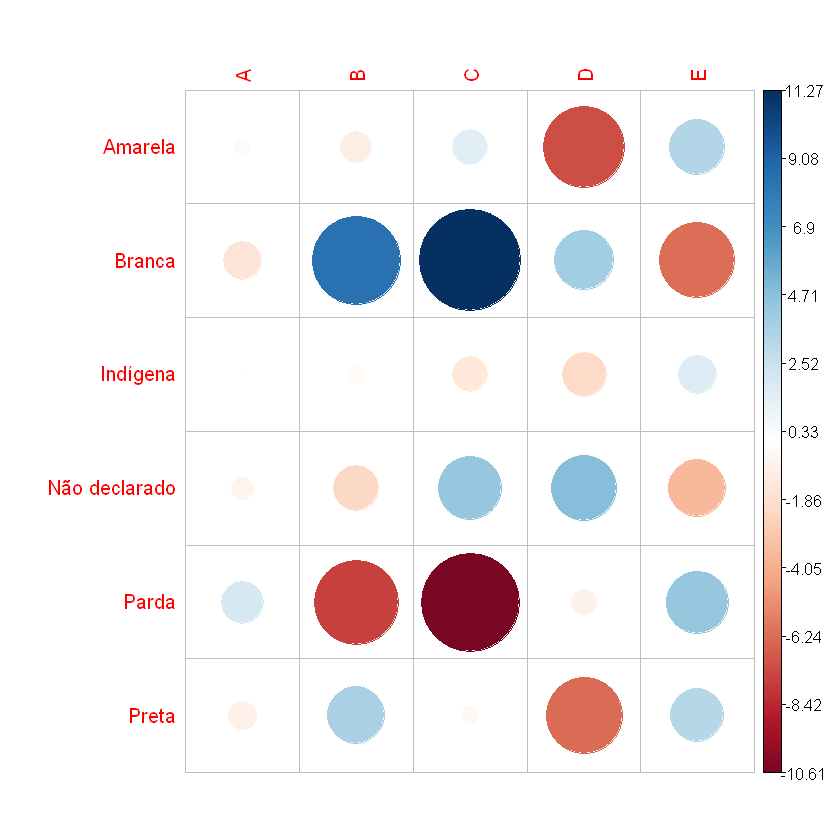

In [18]:
library(corrplot)
corrplot(chisq$residuals, is.cor = FALSE)

In [19]:
# Contibution in percentage (%)
contrib <- 100*chisq$residuals^2/chisq$statistic
round(contrib, 3)

                    dados$categorias
dados$descricao_raca      A      B      C      D      E
       Amarela        0.013  0.189  0.301  7.994  1.736
       Branca         0.425 10.937 19.484  2.354  5.896
       Indígena       0.001  0.014  0.287  0.744  0.392
       Não declarado  0.053  0.795  2.890  3.443  2.066
       Parda          0.601  9.262 17.270  0.085  2.831
       Preta          0.118  2.073  0.019  6.199  1.530

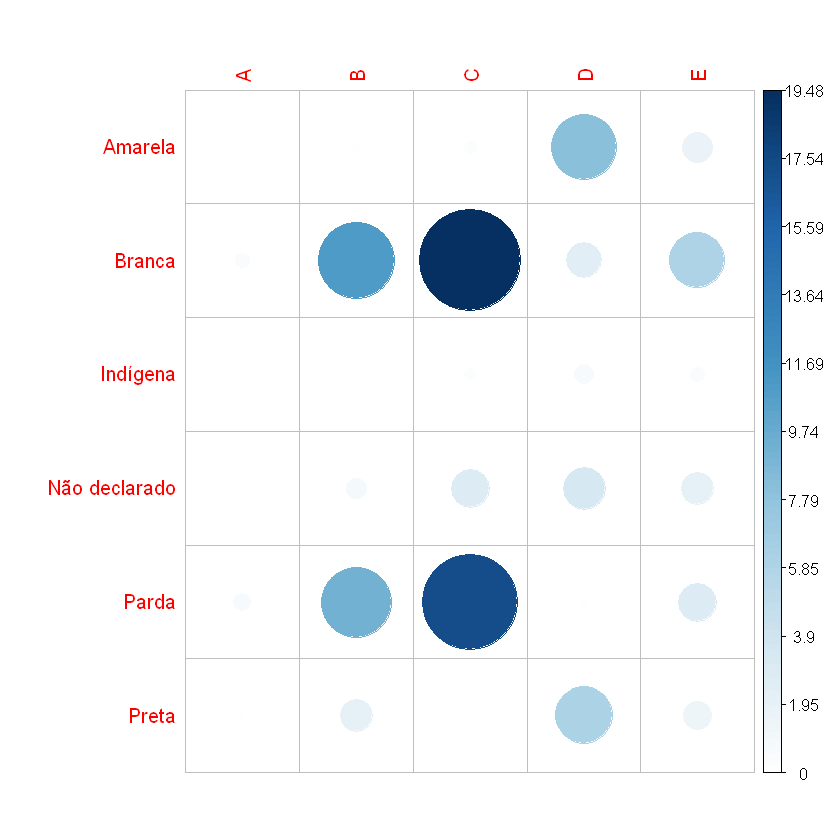

In [20]:
# Visualize the contribution
corrplot(contrib, is.cor = FALSE)

In [ ]:
## Análise MFA com a biblioteca FactoMineR
#http://factominer.free.fr/advanced-methods/multiple-factor-analysis.html
#http://www.sthda.com/english/rpkgs/factoextra/reference/fviz_mfa.html

#removendo coluna desnecessaria
dados$X = NULL
#str(dados)

library("FactoMineR")
d = dados[c("categorias","descricao_historico","descricao_raca","descricao_estado_civil", "descricao_situacao_matricula")] 


head(d)

res = MFA(d, group=c(rep(1, 5)), 
          type=c(rep("n", 5)), ncp=5, 
          name.group=c("categorias","descricao_historico","descricao_raca","descricao_estado_civil", "descricao_situacao_matricula"), 
          num.group.sup=c(1,5))

"
res = MFA(d, group = c(1, 1, 1), 
          type = c('n', 'n', 'n'), ncp = 3, 
          name.group = c('descricao_companhia_domiciliar','descricao_imovel', 'descricao_trabalho'), 
          num.group.sup = c(1,3))

"

"
res = MFA(dados, group=c(rep(1, 45)), 
          type=c(rep('s', 15), rep('n', 30)), ncp=45, 
          name.group=c('aluno_id', 'qtd_filhos', 'media_final', 'percentual_frequencia', 'ch_hora_relogio', 'ano_letivo__ano',
    'periodo_letivo', 'ensino_fundamental_conclusao', 'ano_letivo__ano_aluno', 
    'qtd_pessoas_domicilio', 'qnt_pc', 'quantidade_smartphones',
    'renda_bruta_familiar', 'renda_per_capita', 'tempo_sem_estudar',
    'descricao_historico', 'aluno_exclusivo_rede_publica', 
    'descricao_companhia_domiciliar','ficou_tempo_sem_estudar', 'descricao_internet',
    'local_acesso_internet', 'descricao_mae_escolaridade', 
    'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio', 'descricao_pai_escolaridade', 
    'possui_conhecimento_informatica', 'possui_necessidade_especial', 
    'descricao_afastamento', 
    'descricao_trabalho_responsavel', 
    'descricao_responsavel_financeiro', 'descricao_responsavel_escolaridade',  
    'descricao_area_residencial', 'descricao_imovel', 'descricao_saude', 
    'descricao_trabalho', 'cep', 'pessoa_fisica__nascimento_data', 
    'descricao', 'codigo_censup', 'codigo_siape', 'descricao_raca', 'inativo_siape', 'descricao_estado_civil',
    'descricao_situacao_matricula', 'categorias'), 
         num.group.sup=c(1,45)
         )
"

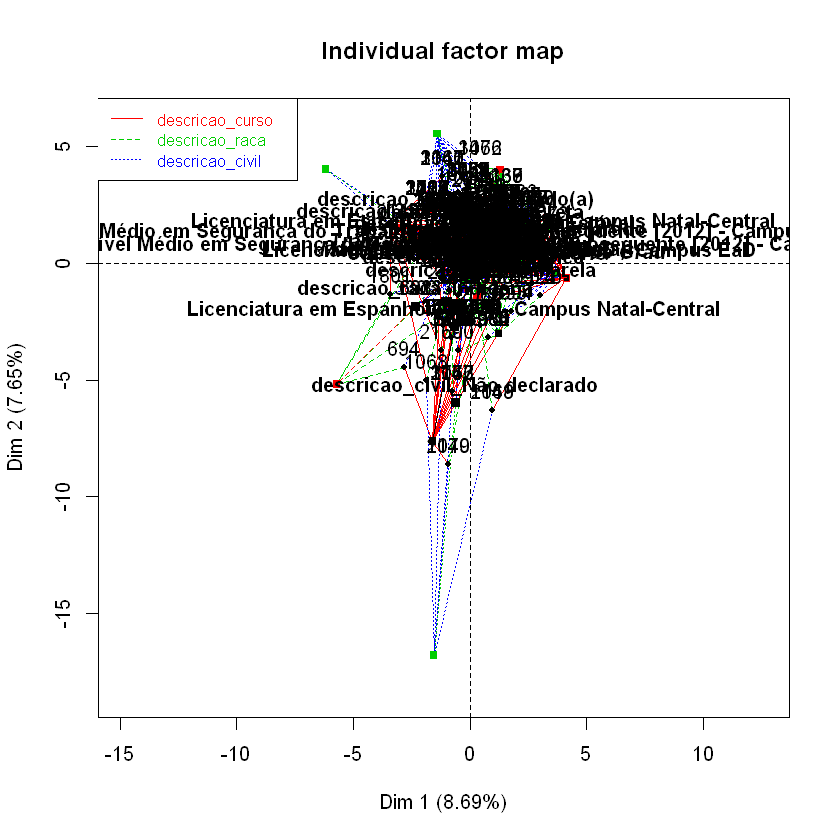

In [57]:
plot(res,choix="ind",partial="all")

In [58]:
# Mostrando autovalores
res$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,1.217180e+00,8.694141e+00,8.694141
comp 2,1.071441e+00,7.653149e+00,16.347290
comp 3,1.057143e+00,7.551018e+00,23.898308
comp 4,1.024358e+00,7.316841e+00,31.215149
comp 5,1.017915e+00,7.270822e+00,38.485970
comp 6,1.013432e+00,7.238802e+00,45.724773
comp 7,1.004568e+00,7.175485e+00,52.900258
comp 8,9.924632e-01,7.089023e+00,59.989281
comp 9,9.894754e-01,7.067681e+00,67.056962
comp 10,9.846785e-01,7.033418e+00,74.090380


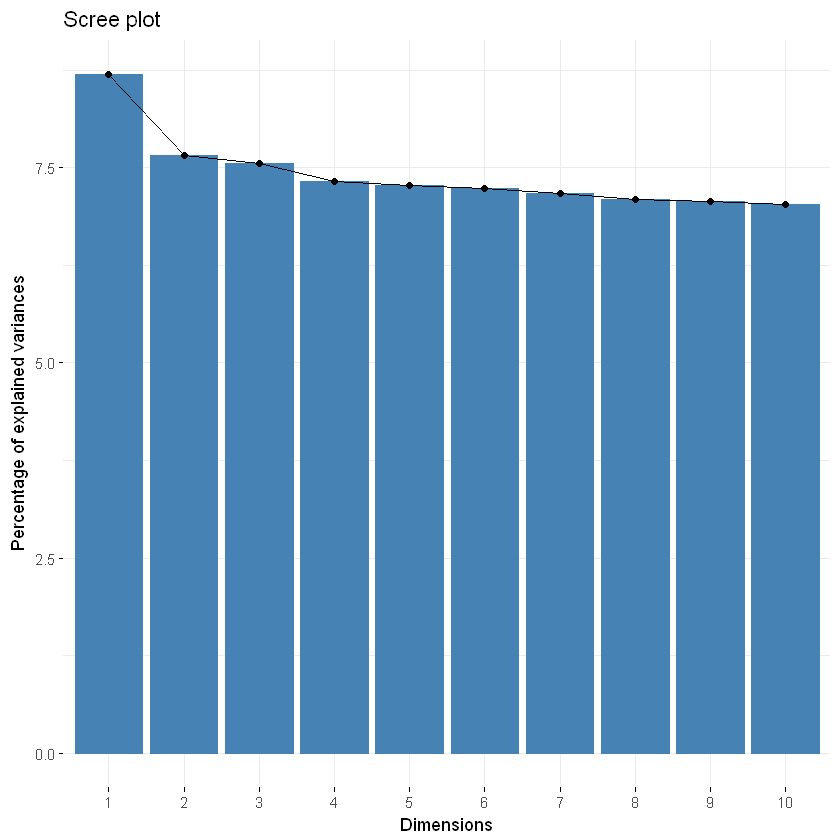

In [83]:
# Barplot das variâncias
#library(factoextra)
fviz_screeplot(res)

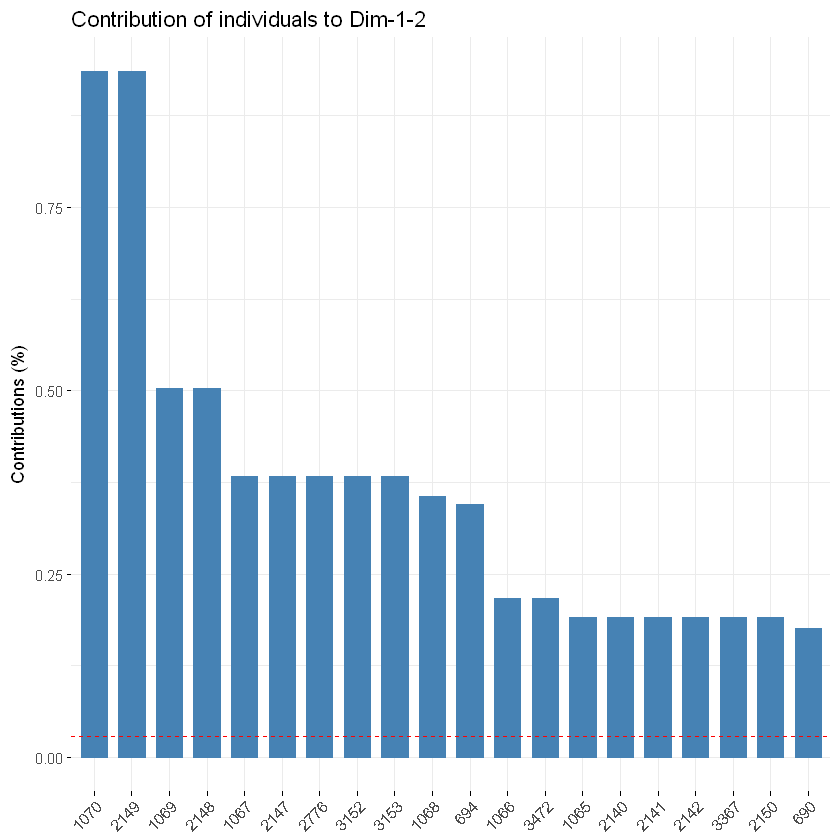

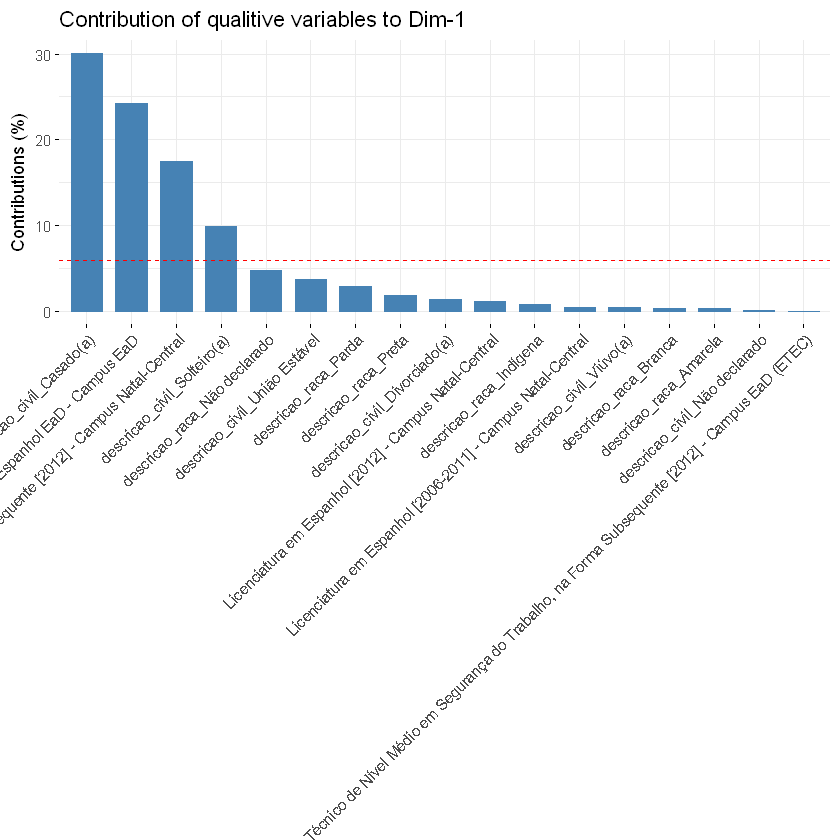

In [73]:
# Contribuições das variáveis nas primeiras componentes
fviz_contrib(res, choice ="ind", axes = 1:2, top = 20)

fviz_contrib(res, choice ="quali.var", axes = 1)

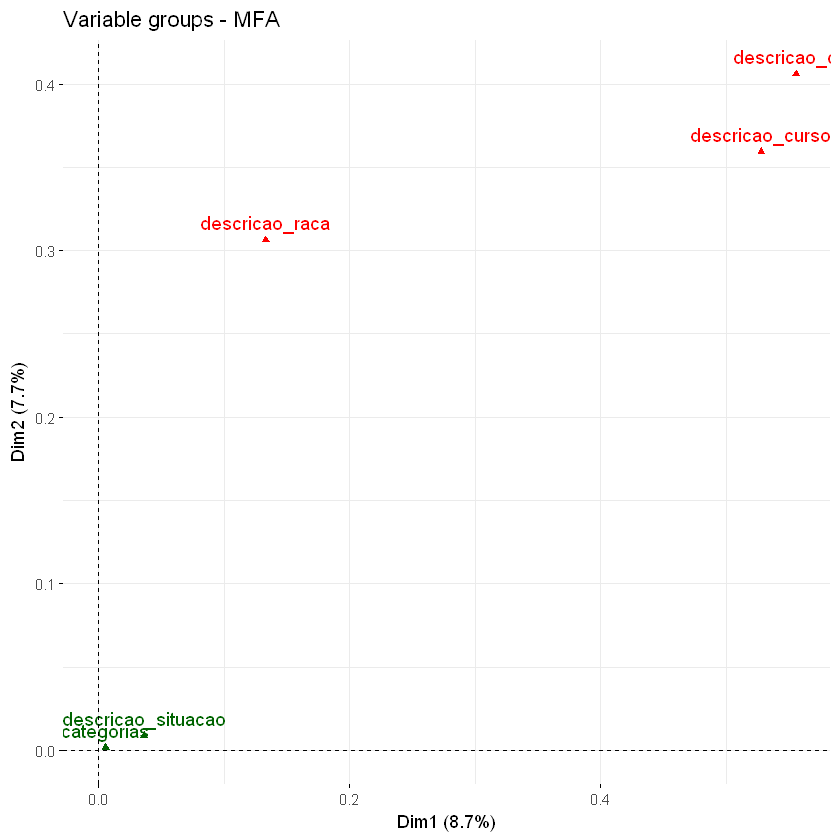

In [84]:
fviz_mfa_var(res, "group")

In [85]:
fviz_mfa_var(res, "quanti.var", palette = "jco",
  col.var.sup = "violet", repel = TRUE)

ERROR: Error in .check_if_quanti_exists(X): There are no quantitative variables to plot.


In [86]:
fviz_mfa_ind(res, col.ind = "cos2",
  gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
  repel = TRUE)

ERROR: Error in get0(oNam, envir = ns): não foi possível abrir o arquivo 'C:/Users/Thiago/Documents/R/win-library/3.3/ggrepel/R/ggrepel.rdb': No such file or directory


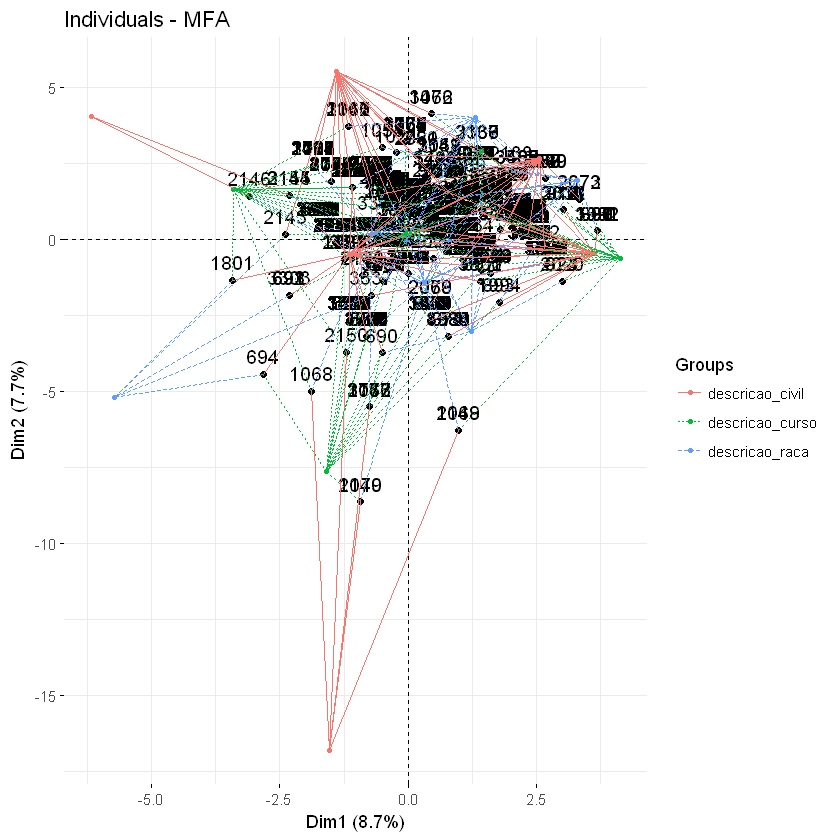

In [88]:
fviz_mfa_ind(res, partial = "all")

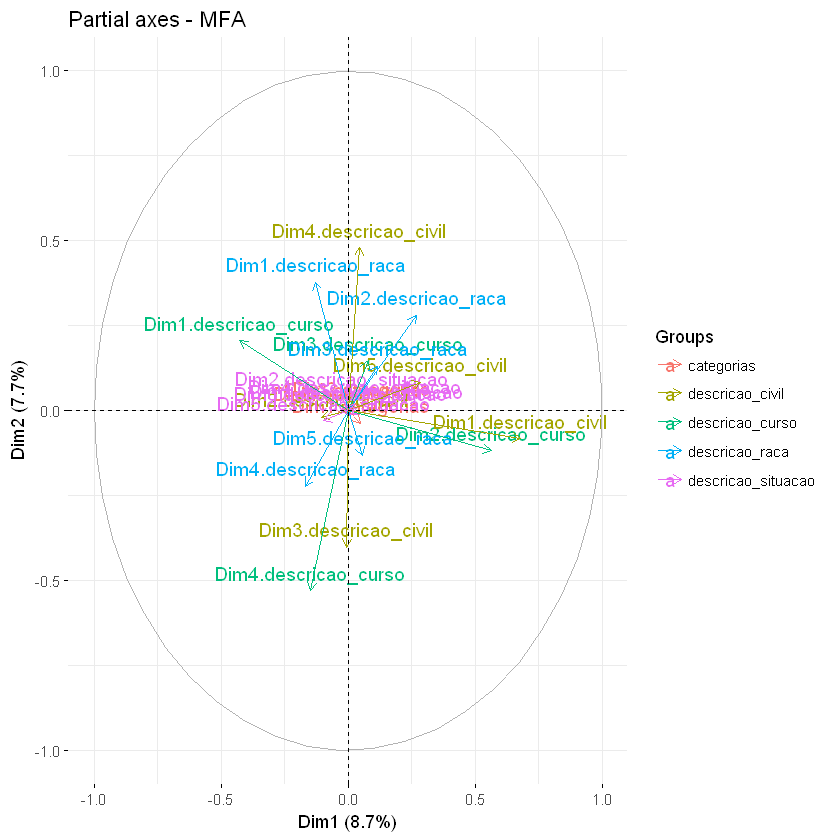

In [89]:
fviz_mfa_axes(res)

Too few points to calculate an ellipse


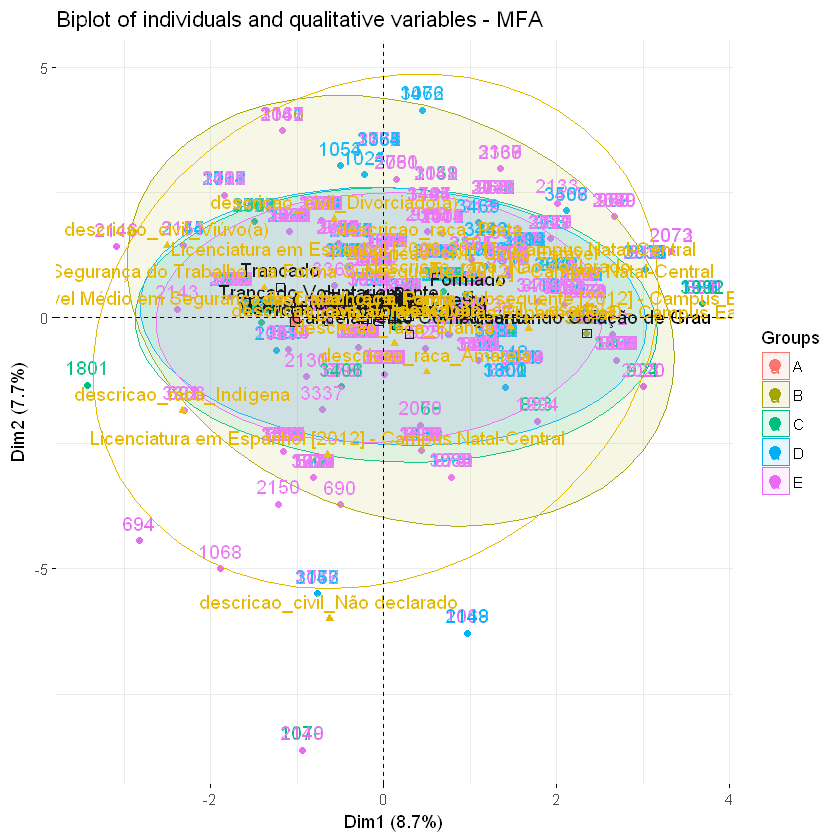

In [92]:
grp <- as.factor(dados[, "categorias"])
fviz_mfa_quali_biplot(res, repel = FALSE, col.var = "#E7B800",
   habillage = grp, addEllipses = TRUE, ellipse.level = 0.95)